# Analyse graphique Work In Progress

In [1]:
# import des bibliotheques 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
data_amelie = pd.read_csv("donnee_temp/depense_age.csv")
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32207 entries, 0 to 32206
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   annee                                   32207 non-null  int64  
 1   top                                     32207 non-null  object 
 2   montant_moy                             32207 non-null  float64
 3   nb_traités_pathologie_OK                32207 non-null  float64
 4   nb_traités_autre_patho                  32207 non-null  float64
 5   montant                                 32207 non-null  int64  
 6   sexe                                    32200 non-null  float64
 7   cla_age_5                               32200 non-null  object 
 8   Ntop                                    32200 non-null  float64
 9   patho_niv1                              32200 non-null  object 
 10  patho_niv2                              32200 non-null  ob

In [3]:
# import des données
data_amelie = pd.read_csv("donnee_temp/depense_age.csv",dtype={
    'annee':'uint16'
    ,'patho_niv1':'category'
    ,'patho_niv2':'category'
    ,'patho_niv3':'category'
    ,'top':'category'
    ,'montant':'int64'
    ,'nb_traités_pathologie_OK ':'float64'
    ,'nb_traités_autre_patho ':'float64'
    ,'montant_moy':'float64'
    ,'sexe':'float64'
    ,'cla_age_5':'category'
    ,'Ntop':'float64'
    ,'pourcentage acte selon la classe d\'age':'float64'
    ,'nb_traités_pathologie_OK_class_age ':'float64'
    ,'b_traités_autre_patho_class_age':'float64'
    ,'montant par classe d\'age':'float64'
    ,'pop':'float64'
})


In [4]:
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32207 entries, 0 to 32206
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   annee                                   32207 non-null  uint16  
 1   top                                     32207 non-null  category
 2   montant_moy                             32207 non-null  float64 
 3   nb_traités_pathologie_OK                32207 non-null  float64 
 4   nb_traités_autre_patho                  32207 non-null  float64 
 5   montant                                 32207 non-null  int64   
 6   sexe                                    32200 non-null  float64 
 7   cla_age_5                               32200 non-null  category
 8   Ntop                                    32200 non-null  float64 
 9   patho_niv1                              32200 non-null  category
 10  patho_niv2                              32200 

In [5]:
# config graphe
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [6]:
# fonction pour funcformatter

def nombre_en_milliard(nb,pos):
    return format(round(nb/(10e9)),'_').replace("_"," ")

def nombre_en_million(nb,pos):
    return format(round(nb/(10e6)),'_').replace("_"," ")



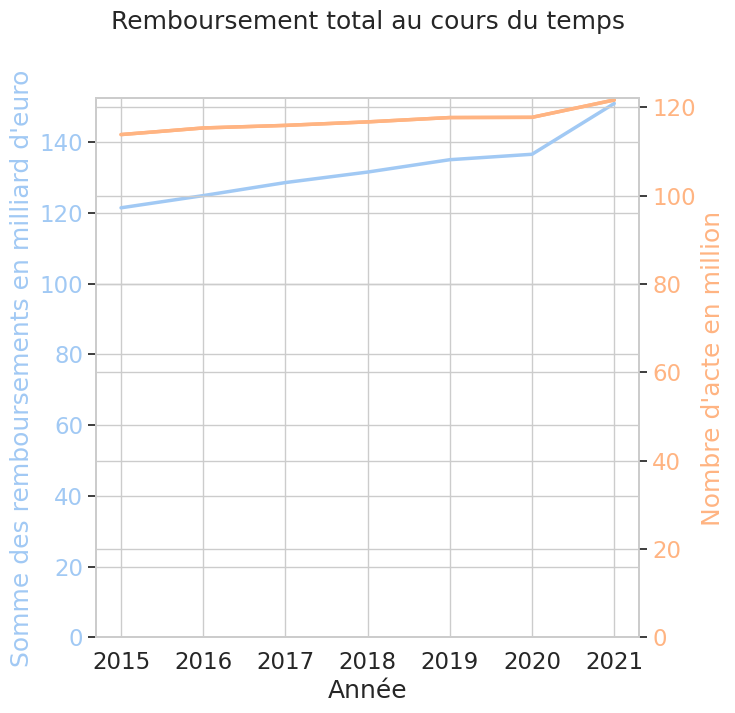

In [7]:
# regoupement des datas pour affichages
data_annee = data_amelie.groupby(
    by=["annee","top"],observed=True).agg(
        montant=('montant','first'),montant_moyen=('montant_moy','mean'),nb_acte=('Ntop','sum')).reset_index().groupby(
            by=["annee"],observed=True).agg(
                montant=('montant','sum'),montant_moyen=('montant_moyen','mean'),nb_acte=('nb_acte','sum')).reset_index()
couleur_axe_1 = 0
couleur_axe_2 = 1

# affichage
fig,ax1 = plt.subplots()
sns.lineplot(ax=ax1,data=data_annee,x='annee',y='montant',color=palette[couleur_axe_1])
fig.set_size_inches(7,7)
ax1.set_title('Remboursement total au cours du temps',pad=50)
ax1.set_xlabel('Année')
ax1.set_ylabel('Somme des remboursements en milliard d\'euro',color=palette[couleur_axe_1])
ax1.tick_params(axis='y', labelcolor=palette[couleur_axe_1])
ax1.yaxis.set_major_formatter(FuncFormatter(nombre_en_milliard))
ax1.set_ylim(0)

ax2 = ax1.twinx()

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])
ax2.set_ylabel('Nombre d\'acte en million',color=palette[couleur_axe_2])
ax2.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax2.tick_params(axis='y', labelcolor=palette[couleur_axe_2])
ax2.set_ylim(0)

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])

plt.show()

#suppression des données en ram
del data_annee

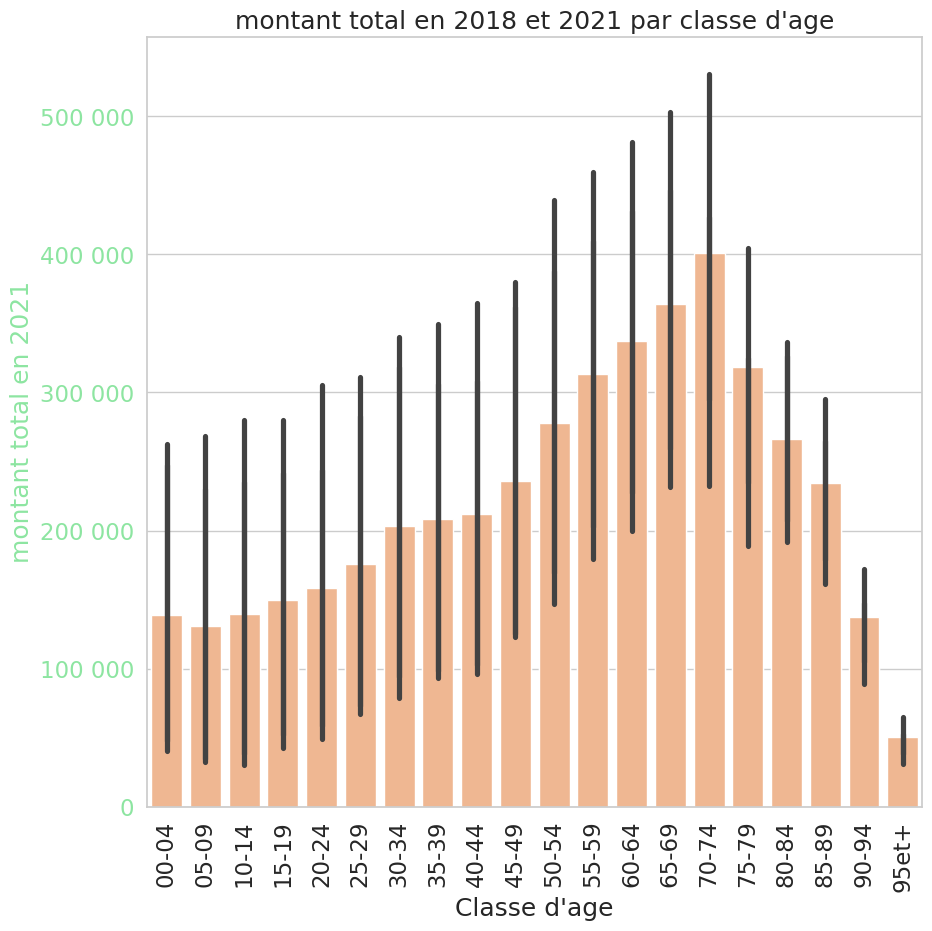

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie[data_amelie['annee']==2018],x='cla_age_5',y='montant par classe d\'age',ax=ax,estimator='sum')
ax.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax.set_title("montant total en 2018 et 2021 par classe d'age")
ax.set_xlabel('Classe d\'age')
ax.set_ylabel('Montant total en million d\'euros')
ax.tick_params(axis='x', labelrotation=90)

sns.barplot(data=data_amelie[data_amelie['annee']==2021],x='cla_age_5',y='montant par classe d\'age',ax=ax,estimator='sum')
ax.set_ylabel('montant total en 2021',color=palette[2])
ax.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax.tick_params(axis='y', labelcolor=palette[2])
ax.set_ylim(0)
plt.show()

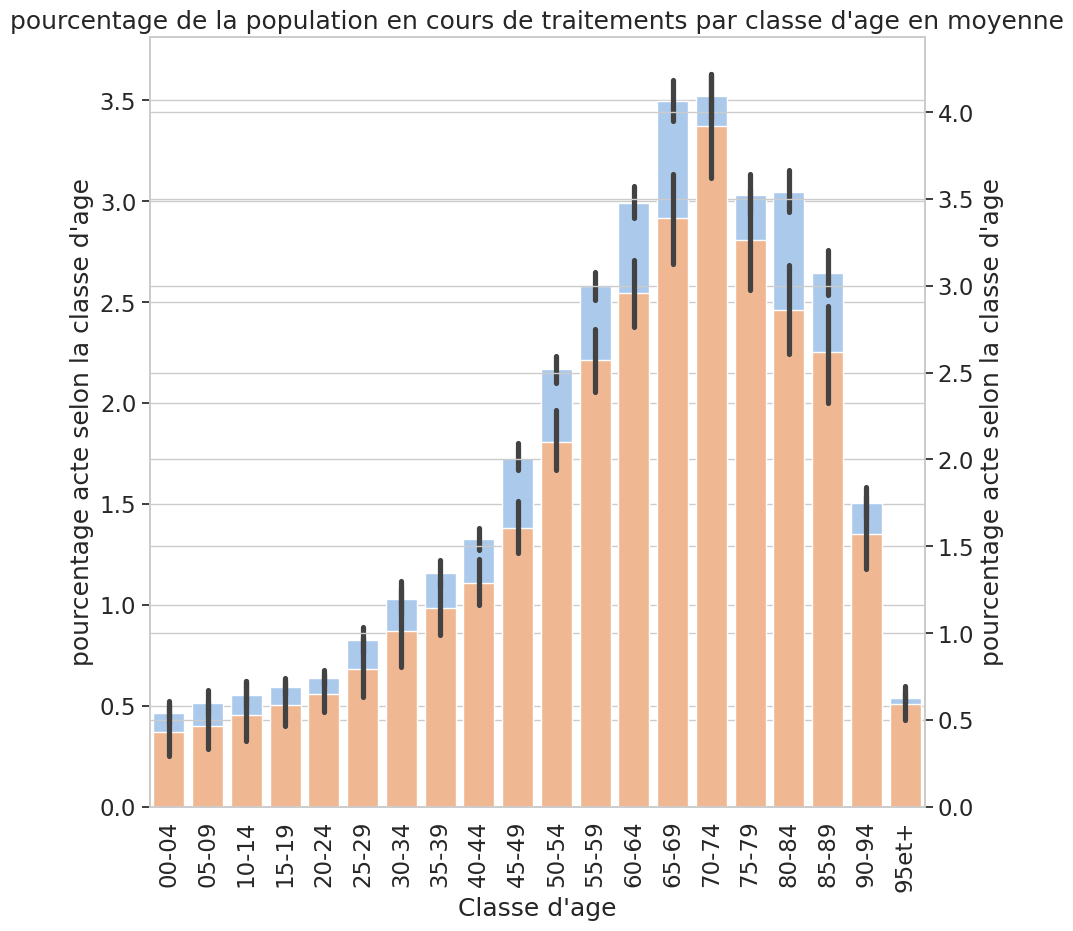

In [9]:
fig,ax1 = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie,x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax1,estimator='mean')
ax1.set_title('pourcentage de la population en cours de traitements par classe d\'age en moyenne')
ax1.set_xlabel('Classe d\'age')
ax1.tick_params(axis='x', labelrotation=90)

ax2=ax1.twinx()
sns.barplot(data=data_amelie[data_amelie['annee']==2021],x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax2,estimator='mean',color=palette[1])
ax2.set_xlabel('Classe d\'age')
ax2.tick_params(axis='x', labelrotation=90)

plt.show()

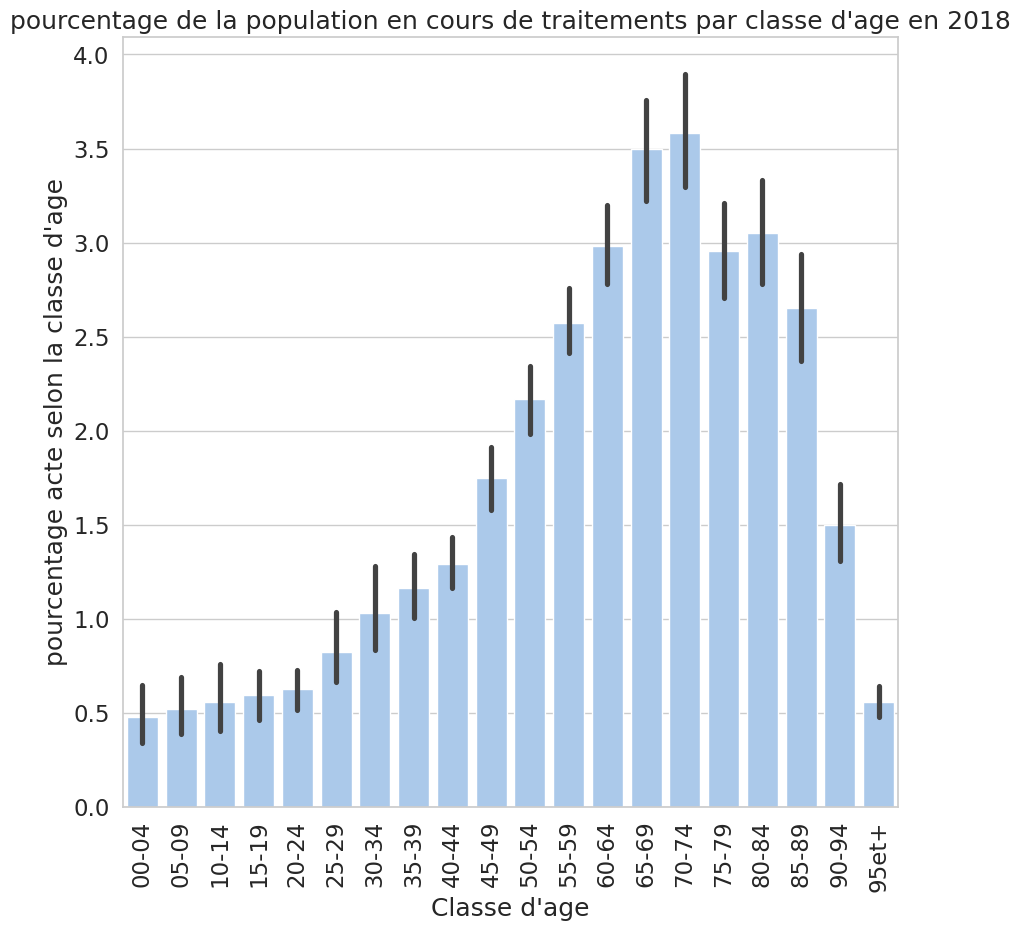

In [10]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie[data_amelie['annee']==2018],x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax,estimator='mean')
ax.set_title('pourcentage de la population en cours de traitements par classe d\'age en 2018')
ax.set_xlabel('Classe d\'age')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

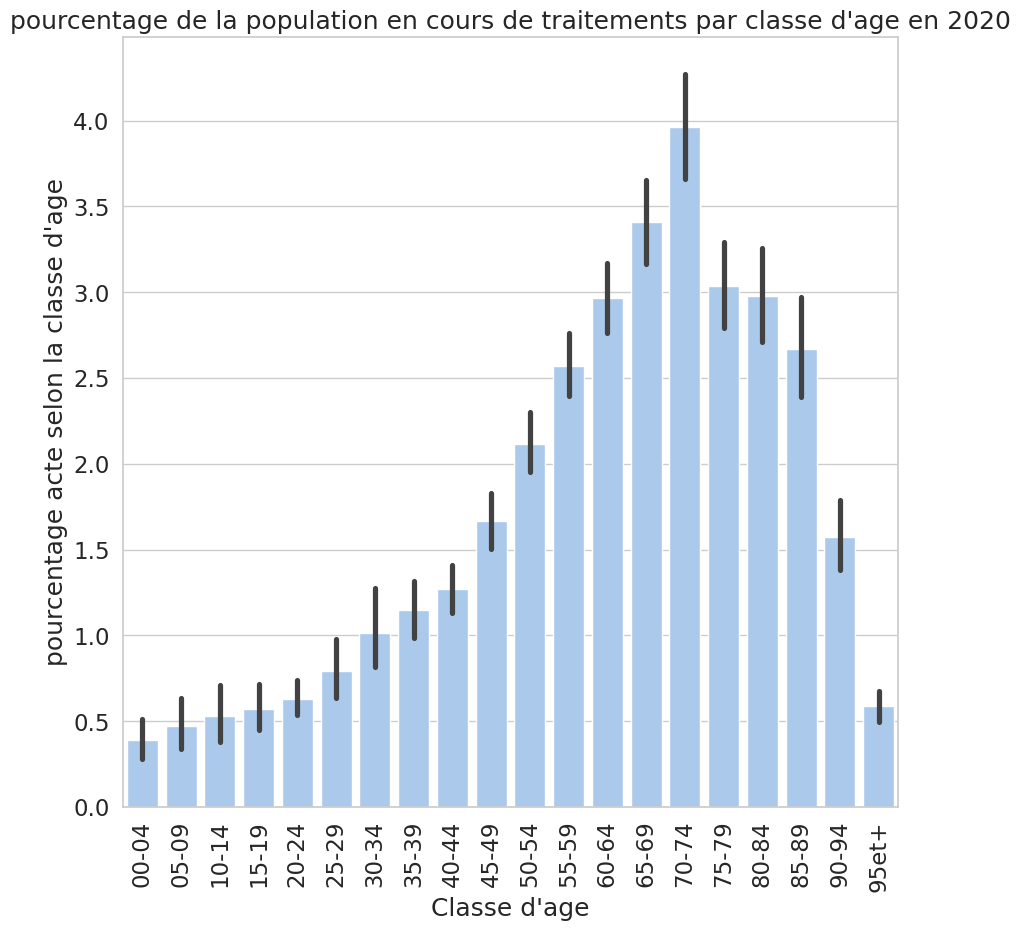

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie[data_amelie['annee']==2020],x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax,estimator='mean')
ax.set_title('pourcentage de la population en cours de traitements par classe d\'age en 2020')
ax.set_xlabel('Classe d\'age')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [20]:
amelie2021 = data_amelie[data_amelie['annee']==2021].copy()
amelie2021.groupby(by=['annee','top'],observed=True).agg(montant=('montant','mean'),nb_patient=('nb_traités_pathologie_OK','mean')).reset_index()


,annee,top,montant,nb_patient
0,2021,sup_Arthros_med,4.003487e+09,30166500.0
1,2021,sup_CanAutr_cat,3.532413e+10,54695700.0
2,2021,sup_CanColo_cat,5.383681e+09,11247300.0
3,2021,sup_CanPoum_cat,8.899060e+09,4850100.0
4,2021,sup_CanPros_cat,6.497896e+09,16487400.0
...,...,...,...,...
75,2021,top_Psychos_ind,1.551000e+10,14641800.0
76,2021,top_RDialyse_ind,1.074235e+10,1706400.0
77,2021,top_Rtrans_aig,6.544736e+08,92100.0
78,2021,top_Rtrans_chr,1.654811e+09,1230900.0


In [12]:
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32207 entries, 0 to 32206
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   annee                                   32207 non-null  uint16  
 1   top                                     32207 non-null  category
 2   montant_moy                             32207 non-null  float64 
 3   nb_traités_pathologie_OK                32207 non-null  float64 
 4   nb_traités_autre_patho                  32207 non-null  float64 
 5   montant                                 32207 non-null  int64   
 6   sexe                                    32200 non-null  float64 
 7   cla_age_5                               32200 non-null  category
 8   Ntop                                    32200 non-null  float64 
 9   patho_niv1                              32200 non-null  category
 10  patho_niv2                              32200 